In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, fbeta_score, accuracy_score

def perfo(y_true, y_pred, beta=1):
    """
    Evaluate the performance of a classification model.
    
    Parameters:
    y_true (list): List of true class labels
    y_pred (list): List of predicted class labels
    beta (float): Weight of recall in the F-beta score

    Returns:
    dict: Dictionary containing performance metrics
    """
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate metrics
    sensitivity = recall = tp / (tp + fn)  # Sensitivity (Recall)
    specificity = tn / (tn + fp)         # Specificity
    precision = precision_score(y_true, y_pred)  # Precision
    accuracy = accuracy_score(y_true, y_pred)    # Accuracy
    f_beta = fbeta_score(y_true, y_pred, beta=beta)  # F-beta score

    # Compile metrics into a dictionary
    metrics = {
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'Accuracy': accuracy,
        'F-beta Score': f_beta
    }

    return metrics

# Example usage:
# y_true = [actual class labels]
# y_pred = [predicted class labels]
# metrics = perfo(y_true, y_pred, beta=1)
# print(metrics)


# 데이터 불러오기

In [4]:
os.getcwd()

'c:\\Users\\Owner\\Desktop\\윤태준\\소\\거비프 데이터-2023\\code'

In [5]:
# 파일이 존재하는 경로 불러오기 및 리스트
path = '../data'
file_lst = os.listdir(path)# 폴더 내 파일 리스트
file_lst

['train.csv',
 '거비프 데이터-2020.xlsx',
 '거비프 데이터-2021.xlsx',
 '거비프 데이터-2022.xlsx',
 '거비프 데이터-2023.xlsx',
 '도축두수 상위 KPN 산차별 성적 평균.xlsx']

In [7]:
# data1 = pd.read_excel('../data/거비프 데이터-2020.xlsx')
# data2 = pd.read_excel('../data/거비프 데이터-2021.xlsx')
# data3 = pd.read_excel('../data/거비프 데이터-2022.xlsx')

data4 = pd.read_excel('../data/거비프 데이터-2023.xlsx')

# 탐색

In [20]:
train = pd.read_csv('../data/train.csv', encoding = 'cp949')
train_copy = train.copy()

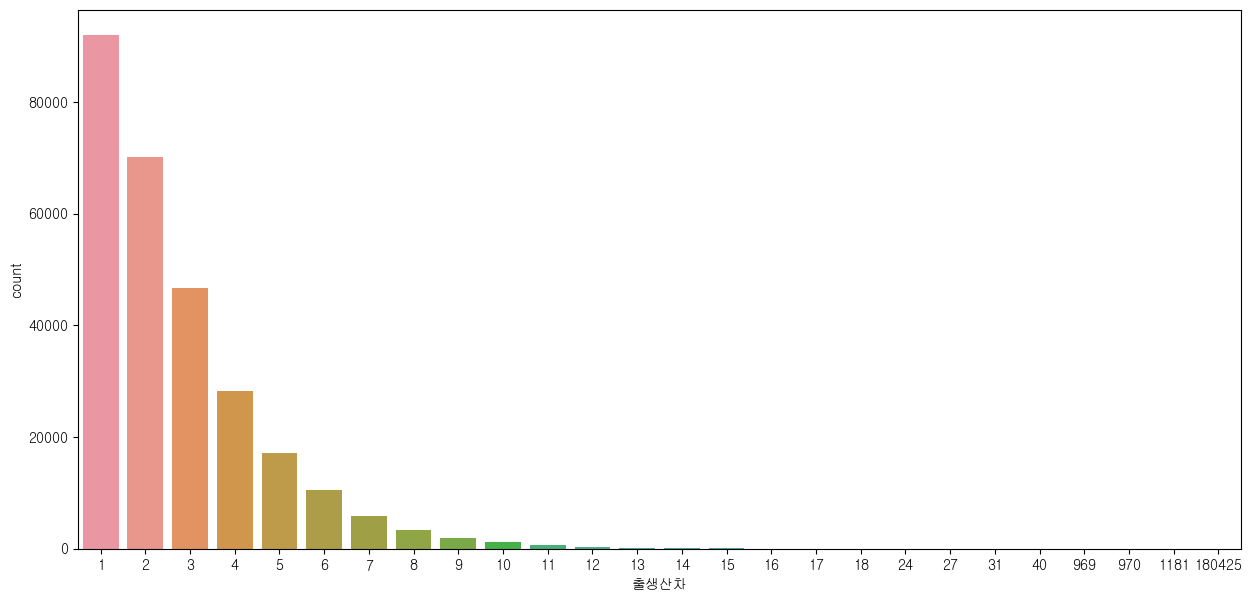

In [23]:
plt.figure(figsize=(15, 7))  

sns.countplot(x='출생산차', data=train_copy)
plt.show()

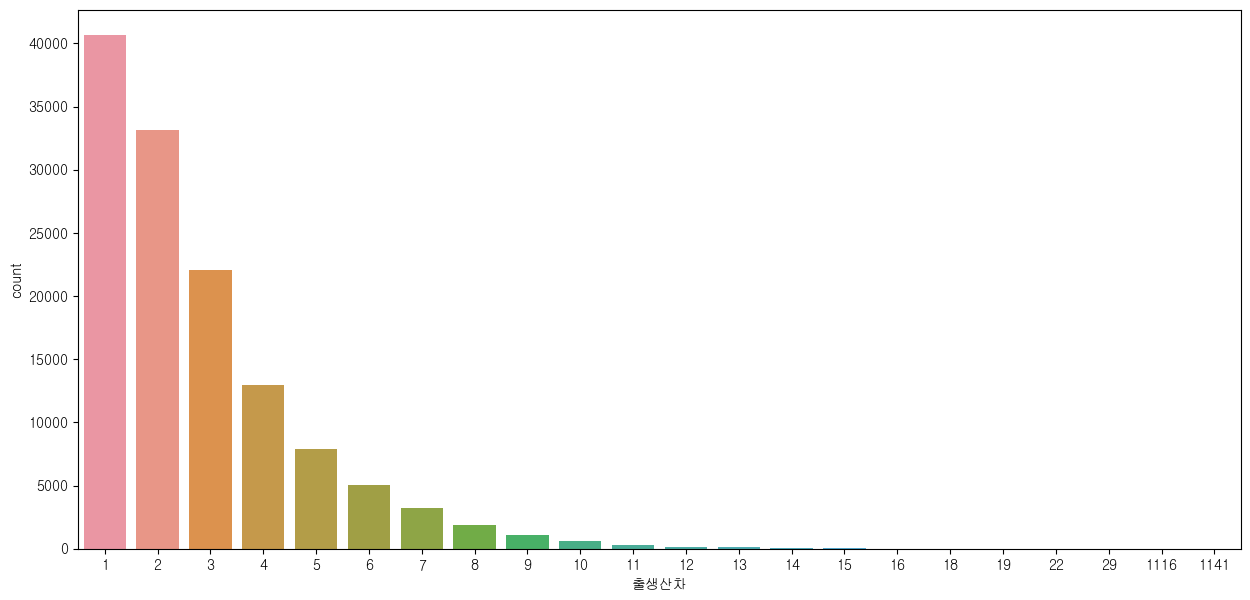

In [24]:
plt.figure(figsize=(15, 7))  

sns.countplot(x='출생산차', data=data4)
plt.show()

In [25]:
print(train_copy['근내환산점수'].value_counts())
print(train_copy['근내환산점수'].value_counts()/len(train_copy['근내환산점수']))

5    101658
4     86465
3     62392
2     25347
1      2092
0       173
Name: 근내환산점수, dtype: int64
5    0.365509
4    0.310883
3    0.224329
2    0.091135
1    0.007522
0    0.000622
Name: 근내환산점수, dtype: float64


# 데이터 전처리

## 변수변환 - target 1,2,3 만들기

In [26]:
# target1, 2, 3 만들기
train_copy['target1'] = train_copy['근내환산점수'].apply(lambda x: 1 if 5 == x else 0)
train_copy['target2'] = train_copy['근내환산점수'].apply(lambda x: 1 if 4 <= x else 0)
train_copy['target3'] = train_copy['근내환산점수'].apply(lambda x: 1 if 3 <= x else 0)

In [27]:
data4['target1'] = data4['근내환산점수'].apply(lambda x: 1 if 5 == x else 0)
data4['target2'] = data4['근내환산점수'].apply(lambda x: 1 if 4 <= x else 0)
data4['target3'] = data4['근내환산점수'].apply(lambda x: 1 if 3 <= x else 0)

In [28]:
# 확인
print('target1 확인')
print(train_copy['target1'].value_counts())
print(len(train_copy[train_copy['근내환산점수']==5]))
print(('\n'))
print('target2 확인')
print(train_copy['target2'].value_counts())
print(len(train_copy[train_copy['근내환산점수']>=4]))
print(('\n'))
print('target3 확인')
print(train_copy['target3'].value_counts())
print(len(train_copy[train_copy['근내환산점수']>=3]))

target1 확인
0    176469
1    101658
Name: target1, dtype: int64
101658


target2 확인
1    188123
0     90004
Name: target2, dtype: int64
188123


target3 확인
1    250515
0     27612
Name: target3, dtype: int64
250515


In [29]:
# 출생산차 binary 만들기
train_copy['산차_binary'] = train_copy['출생산차'].apply(lambda x: 1 if 1 == x else 0)

data4['산차_binary'] = data4['출생산차'].apply(lambda x: 1 if 1 == x else 0)

In [30]:
print(len(train_copy[train_copy['산차_binary']==1]))
print(len(train_copy[train_copy['출생산차']==1]))

print(len(data4[data4['산차_binary']==1]))
print(len(data4[data4['출생산차']==1]))

91891
91891
40629
40629


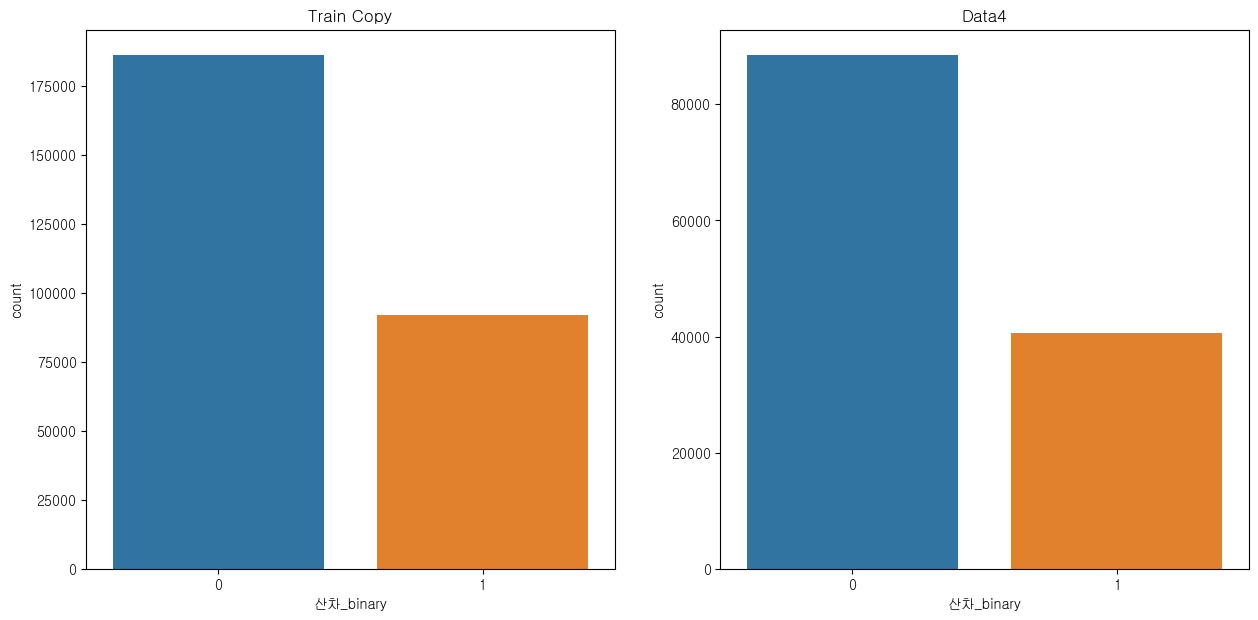

In [35]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.countplot(x='산차_binary', data=train_copy)
plt.title('Train Copy')

plt.subplot(1, 2, 2)
sns.countplot(x='산차_binary', data=data4)
plt.title('Data4')

plt.show()

## 모델링

In [37]:
train_2 = train_copy[(train_copy['출생산차']!=180425)|(train_copy['출생산차']!=1181)|(train_copy['출생산차']!=970)|(train_copy['출생산차']!=969)].copy()

In [38]:
train_2 = train_2.rename(columns=lambda x: x.replace(' ', ''))
train_2.columns

Index(['목장코드', '출생월', '도축개월령', '생시체중', '출생산차', 'EPD근내', 'EPD냉도체중', 'KPN체고',
       'KPN체장', '실제도축도체중', '실제도축근내지방', '근내환산점수', '도축단가가산점수', '개월령의근내평균',
       '개월령의도체중평균', '개월령의도체범위의근내평균', '개월령의도체범위의도체중평균', '형매근내평균가산점수',
       '거세우형매도축단가가산평균', '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수',
       '농가도체중평균가산점수', 'target1', 'target2', 'target3', '산차_binary'],
      dtype='object')

### target1

In [41]:
model2 = sm.Logit.from_formula(""" target1 ~ 도축개월령+ 생시체중+ EPD근내+ EPD냉도체중+ KPN체고+ KPN체장
                              + 실제도축도체중+ 개월령의근내평균 + 개월령의도체중평균
                              + 개월령의도체범위의근내평균 + 개월령의도체범위의도체중평균
                              + 형매근내평균가산점수+ 거세우형매도축단가가산평균 + 어미형매근내평균가산점수 
                              + 외할미형매근내평균가산점수+ 농가근내평균가산점수 
                              + 농가도체중평균가산점수 + C(산차_binary, Treatment(1)) """, train_2).fit()

model2.summary()

Optimization terminated successfully.
         Current function value: 0.579739
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                target1   No. Observations:               277503
Model:                          Logit   Df Residuals:                   277484
Method:                           MLE   Df Model:                           18
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.1173
Time:                        18:29:38   Log-Likelihood:            -1.6088e+05
converged:                       True   LL-Null:                   -1.8226e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -6.6136      0.257    -25.690      0.000      -7.118      -6.109
C(산차_binary, Treatment(1))[T.0]    -0.2276      0.009    -24.992      0.000      -0.245      -0.210
도축개월령                               0.0096      0.002      4.071      0.000       0.005       0.014
생시체중                                0.0137      0.015      0.926      0.355      -0.015       0.043
EPD근내                              -0.0078      0.015     -0.506      0.613      -0.038       0.022
EPD냉도체중                             0.0040      0.001      6.311      0.000       0.003       0.005
KPN체고                               0.0010      0.002      0.449      0.654      -0.003       0.006
KPN체장                               0.0004      0.001      0.384      0.701      -0.002       0.003
실제도축도체중                            -0.0147      0.026     -0.554      0.580      -0.067       0.037
개월령의근내평균                            0.3445      0.024     14.320      0.000       0.297       0.392
개월령의도체중평균                          -0.0042      0.000    -10.754      0.000      -0.005      -0.003
개월령의도체범위의근내평균                       0.7154      0.021     33.999      0.000       0.674       0.757
개월령의도체범위의도체중평균                     -0.0076      0.000    -27.715      0.000      -0.008      -0.007
형매근내평균가산점수                          0.2226      0.004     58.118      0.000       0.215       0.230
거세우형매도축단가가산평균                    3.751e-05   4.41e-06      8.501      0.000    2.89e-05    4.62e-05
어미형매근내평균가산점수                        0.3183      0.014     23.110      0.000       0.291       0.345
외할미형매근내평균가산점수                       0.2475      0.029      8.464      0.000       0.190       0.305
농가근내평균가산점수                          0.3213      0.006     53.860      0.000       0.310       0.333
농가도체중평균가산점수                         0.0003      0.000      1.800      0.072   -2.91e-05       0.001
===================================================================================================
"""

#### train_2, train 성능 보기

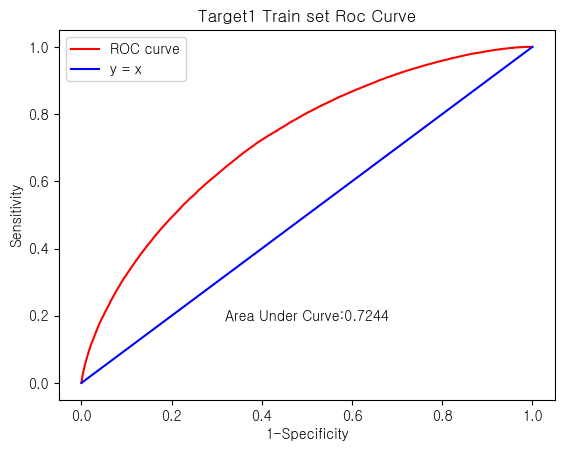

In [42]:
tr_pred2 = model2.predict(train_2)
tr_pred2

train_2['tr_pred2'] = tr_pred2

cal2 = train_2.copy()

cal2.dropna(subset=['tr_pred2'], inplace=True)

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(cal2['target1'], cal2['tr_pred2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(cal2['target1'], cal2['tr_pred2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target1 Train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [43]:
cal2['prob_5'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
cal2['prob_6'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
cal2['prob_7'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
cal2['prob_8'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
cal2['prob_9'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

cal2['prob_85'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(cal2[cal2['근내환산점수']==5])}")
print(f"TARGET1개수:{len(cal2[cal2['target1']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(cal2[cal2['tr_pred2']>=0.5])}")
print(f"prob_5개수:{len(cal2[cal2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(cal2[cal2['tr_pred2']>=0.6])}")
print(f"prob_6개수:{len(cal2[cal2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(cal2[cal2['tr_pred2']>=0.7])}")
print(f"prob_7개수:{len(cal2[cal2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(cal2[cal2['tr_pred2']>=0.8])}")
print(f"prob_8개수:{len(cal2[cal2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(cal2[cal2['tr_pred2']>=0.9])}")
print(f"prob_9개수:{len(cal2[cal2['prob_9']==1])}")

5이상개수:101564
TARGET1개수:101564
0.5이상개수:65659
prob_5개수:65659
0.6이상개수:33760
prob_6개수:33760
0.7이상개수:13461
prob_7개수:13461
0.8이상개수:3273
prob_8개수:3273
0.9이상개수:242
prob_9개수:242


#### confusion matirx, train_2

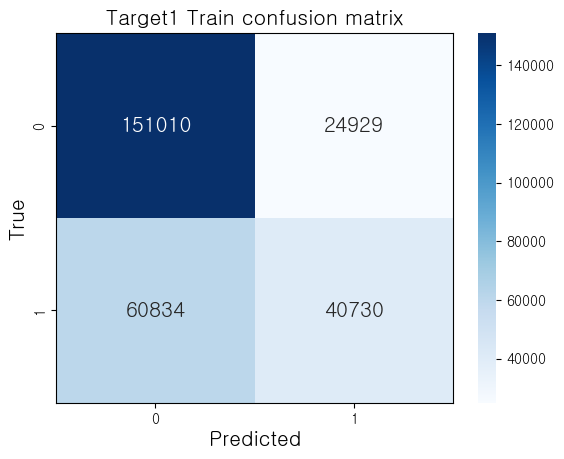

In [44]:
# cut-off 0.5
cm = confusion_matrix(cal2['target1'], cal2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target1 Train confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [45]:
perfo(cal2['target1'], cal2['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.40102792327990233,
 'Specificity': 0.8583088456794684,
 'Precision': 0.620326230981282,
 'Accuracy': 0.6909474852524117,
 'F-beta Score': 0.4871339468852969}

#### train_2, test 성능 보기

In [46]:
data4['출생산차'].unique()
val = data4[(data4['출생산차']!=1141)|(data4['출생산차']!=1116)].copy()

In [47]:
val = val.rename(columns=lambda x: x.replace(' ', ''))
val.columns

Index(['목장코드', '출생월', '도축개월령', '생시체중', '출생산차', 'EPD근내', 'EPD냉도체중', 'KPN체고',
       'KPN체장', '실제도축도체중', '실제도축근내지방', '근내환산점수', '도축단가가산점수', '개월령의근내평균',
       '개월령의도체중평균', '개월령의도체범위의근내평균', '개월령의도체범위의도체중평균', '형매근내평균가산점수',
       '거세우형매도축단가가산평균', '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수',
       '농가도체중평균가산점수', 'target1', 'target2', 'target3', '산차_binary'],
      dtype='object')

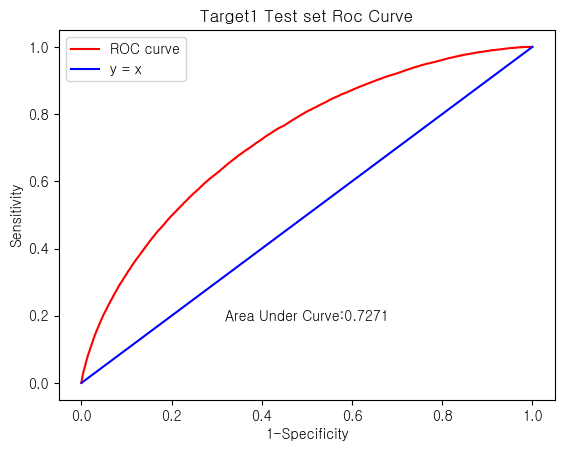

In [48]:
val_pred2 = model2.predict(val)
val_copy2 = val.copy()
val_copy2['val_pred2'] = val_pred2

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(val_copy2['target1'], val_copy2['val_pred2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(val_copy2['target1'], val_copy2['val_pred2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target1 Test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [49]:
val_copy2['prob_5'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
val_copy2['prob_6'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
val_copy2['prob_7'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
val_copy2['prob_8'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
val_copy2['prob_9'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

val_copy2['prob_85'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(val_copy2[val_copy2['근내환산점수']==5])}")
print(f"TARGET1개수:{len(val_copy2[val_copy2['target1']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.5])}")
print(f"prob_5개수:{len(val_copy2[val_copy2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.6])}")
print(f"prob_6개수:{len(val_copy2[val_copy2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.7])}")
print(f"prob_7개수:{len(val_copy2[val_copy2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.8])}")
print(f"prob_8개수:{len(val_copy2[val_copy2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.9])}")
print(f"prob_9개수:{len(val_copy2[val_copy2['prob_9']==1])}")

5이상개수:51805
TARGET1개수:51805
0.5이상개수:39071
prob_5개수:39071
0.6이상개수:20989
prob_6개수:20989
0.7이상개수:8682
prob_7개수:8682
0.8이상개수:2351
prob_8개수:2351
0.9이상개수:236
prob_9개수:236


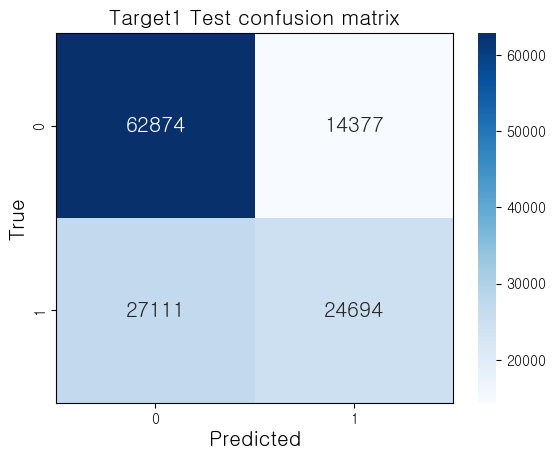

In [50]:
# cut-off 0.5
cm = confusion_matrix(val_copy2['target1'], val_copy2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target1 Test confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [51]:
perfo(val_copy2['target1'], val_copy2['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.4766721358942187,
 'Specificity': 0.8138923767977113,
 'Precision': 0.6320288705177753,
 'Accuracy': 0.6785271510042152,
 'F-beta Score': 0.5434658215590475}

### target2

In [52]:
model2_target2 = sm.Logit.from_formula(""" target2 ~ 도축개월령+ 생시체중+ EPD근내+ EPD냉도체중+ KPN체고+ KPN체장
                              + 실제도축도체중+ 개월령의근내평균 + 개월령의도체중평균
                              + 개월령의도체범위의근내평균 + 개월령의도체범위의도체중평균
                              + 형매근내평균가산점수+ 거세우형매도축단가가산평균 + 어미형매근내평균가산점수 
                              + 외할미형매근내평균가산점수+ 농가근내평균가산점수 
                              + 농가도체중평균가산점수 + C(산차_binary,Treatment(1))""", train_2).fit()

model2_target2.summary()

Optimization terminated successfully.
         Current function value: 0.550147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                target2   No. Observations:               277503
Model:                          Logit   Df Residuals:                   277484
Method:                           MLE   Df Model:                           18
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.1253
Time:                        18:31:53   Log-Likelihood:            -1.5267e+05
converged:                       True   LL-Null:                   -1.7455e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -5.1445      0.245    -20.984      0.000      -5.625      -4.664
C(산차_binary, Treatment(1))[T.0]    -0.2407      0.010    -25.133      0.000      -0.260      -0.222
도축개월령                               0.0014      0.002      0.611      0.541      -0.003       0.006
생시체중                               -0.0076      0.015     -0.499      0.618      -0.038       0.022
EPD근내                              -0.0466      0.016     -2.870      0.004      -0.079      -0.015
EPD냉도체중                             0.0021      0.001      3.224      0.001       0.001       0.003
KPN체고                               0.0002      0.002      0.070      0.944      -0.004       0.005
KPN체장                               0.0007      0.001      0.644      0.519      -0.001       0.003
실제도축도체중                             0.0245      0.027      0.896      0.370      -0.029       0.078
개월령의근내평균                            0.3049      0.022     13.779      0.000       0.262       0.348
개월령의도체중평균                          -0.0032      0.000     -9.136      0.000      -0.004      -0.003
개월령의도체범위의근내평균                       0.7684      0.019     40.568      0.000       0.731       0.805
개월령의도체범위의도체중평균                     -0.0088      0.000    -34.722      0.000      -0.009      -0.008
형매근내평균가산점수                          0.2195      0.004     56.335      0.000       0.212       0.227
거세우형매도축단가가산평균                    2.979e-05    4.9e-06      6.073      0.000    2.02e-05    3.94e-05
어미형매근내평균가산점수                        0.3149      0.014     22.215      0.000       0.287       0.343
외할미형매근내평균가산점수                       0.1941      0.030      6.387      0.000       0.135       0.254
농가근내평균가산점수                          0.3059      0.006     50.676      0.000       0.294       0.318
농가도체중평균가산점수                         0.0006      0.000      3.233      0.001       0.000       0.001
===================================================================================================
"""

#### train_2, train 성능 보기

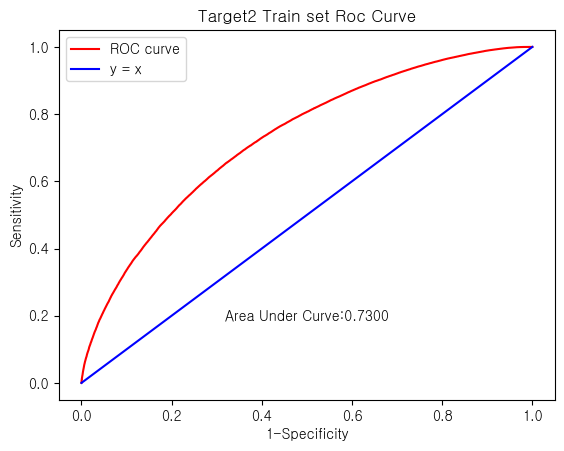

In [53]:
tr_pred2_target2 = model2_target2.predict(train_2)
tr_pred2_target2

train_2['tr_pred2_target2'] = tr_pred2_target2

cal2_target2 = train_2.copy()

cal2_target2.dropna(subset=['tr_pred2_target2'], inplace=True)

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(cal2_target2['target2'], cal2_target2['tr_pred2_target2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(cal2_target2['target2'], cal2_target2['tr_pred2_target2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target2 Train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [54]:
cal2_target2['prob_5'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
cal2_target2['prob_6'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
cal2_target2['prob_7'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
cal2_target2['prob_8'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
cal2_target2['prob_9'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

cal2_target2['prob_85'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(cal2_target2[cal2_target2['근내환산점수']==5])}")
print(f"TARGET1개수:{len(cal2_target2[cal2_target2['target2']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.5])}")
print(f"prob_5개수:{len(cal2_target2[cal2_target2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.6])}")
print(f"prob_6개수:{len(cal2_target2[cal2_target2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.7])}")
print(f"prob_7개수:{len(cal2_target2[cal2_target2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.8])}")
print(f"prob_8개수:{len(cal2_target2[cal2_target2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.9])}")
print(f"prob_9개수:{len(cal2_target2[cal2_target2['prob_9']==1])}")

5이상개수:101564
TARGET1개수:187915
0.5이상개수:231333
prob_5개수:231333
0.6이상개수:196449
prob_6개수:196449
0.7이상개수:145628
prob_7개수:145628
0.8이상개수:79981
prob_8개수:79981
0.9이상개수:19835
prob_9개수:19835


#### confusion matirx, train_2

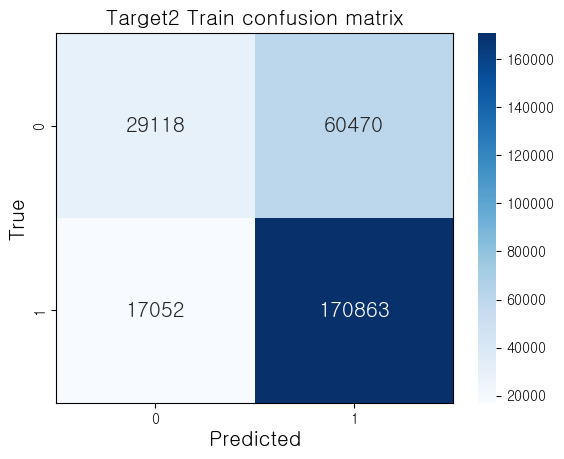

In [55]:
# cut-off 0.5
cm = confusion_matrix(cal2_target2['target2'], cal2_target2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target2 Train confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [56]:
perfo(cal2_target2['target2'], cal2_target2['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.9092568448500652,
 'Specificity': 0.32502120819752645,
 'Precision': 0.7386019288212231,
 'Accuracy': 0.7206444615013171,
 'F-beta Score': 0.8150927374728085}

#### train_2, test 성능 보기

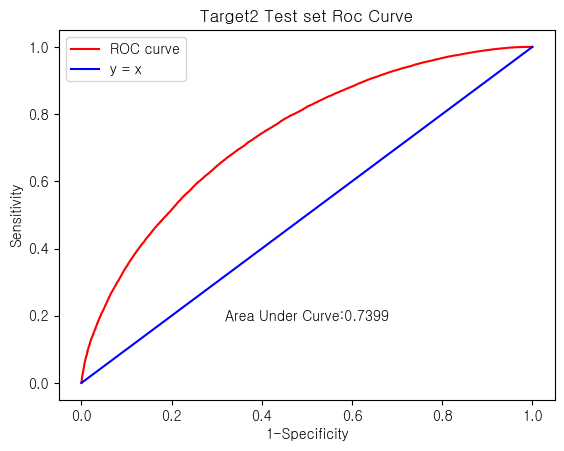

In [57]:
val_pred2_target2 = model2_target2.predict(val)
val_copy2_target2 = val.copy()
val_copy2_target2['val_pred2_target2'] = val_pred2_target2

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(val_copy2_target2['target2'], val_copy2_target2['val_pred2_target2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(val_copy2_target2['target2'], val_copy2_target2['val_pred2_target2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target2 Test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [58]:
val_copy2_target2['prob_5'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
val_copy2_target2['prob_6'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
val_copy2_target2['prob_7'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
val_copy2_target2['prob_8'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
val_copy2_target2['prob_9'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

val_copy2_target2['prob_85'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(val_copy2_target2[val_copy2_target2['근내환산점수']>=4])}")
print(f"TARGET2개수:{len(val_copy2_target2[val_copy2_target2['target2']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.5])}")
print(f"prob_5개수:{len(val_copy2_target2[val_copy2_target2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.6])}")
print(f"prob_6개수:{len(val_copy2_target2[val_copy2_target2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.7])}")
print(f"prob_7개수:{len(val_copy2_target2[val_copy2_target2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.8])}")
print(f"prob_8개수:{len(val_copy2_target2[val_copy2_target2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.9])}")
print(f"prob_9개수:{len(val_copy2_target2[val_copy2_target2['prob_9']==1])}")

5이상개수:90616
TARGET2개수:90616
0.5이상개수:112196
prob_5개수:112196
0.6이상개수:98622
prob_6개수:98622
0.7이상개수:77431
prob_7개수:77431
0.8이상개수:46389
prob_8개수:46389
0.9이상개수:12468
prob_9개수:12468


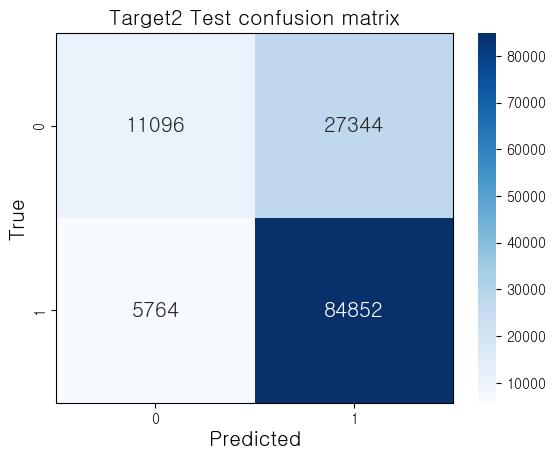

In [59]:
# cut-off 0.5
cm = confusion_matrix(val_copy2_target2['target2'], val_copy2_target2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target2 Test confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [60]:
perfo(val_copy2_target2['target2'], val_copy2_target2['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.9363909243400724,
 'Specificity': 0.2886576482830385,
 'Precision': 0.7562836464758101,
 'Accuracy': 0.7434602033225887,
 'F-beta Score': 0.8367552215845216}

### target3

In [61]:
model2_target3 = sm.Logit.from_formula(""" target3 ~ 도축개월령+ 생시체중+ EPD근내+ EPD냉도체중+ KPN체고+ KPN체장
                              + 실제도축도체중+ 개월령의근내평균 + 개월령의도체중평균
                              + 개월령의도체범위의근내평균 + 개월령의도체범위의도체중평균
                              + 형매근내평균가산점수+ 거세우형매도축단가가산평균 + 어미형매근내평균가산점수 
                              + 외할미형매근내평균가산점수+ 농가근내평균가산점수 
                              + 농가도체중평균가산점수 + C(산차_binary,Treatment(1)) """, train_2).fit()

model2_target3.summary()

Optimization terminated successfully.
         Current function value: 0.264817
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                target3   No. Observations:               277503
Model:                          Logit   Df Residuals:                   277484
Method:                           MLE   Df Model:                           18
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.1768
Time:                        18:33:15   Log-Likelihood:                -73488.
converged:                       True   LL-Null:                       -89276.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.5293      0.369    -12.268      0.000      -5.253      -3.806
C(산차_binary, Treatment(1))[T.0]    -0.2817      0.015    -18.315      0.000      -0.312      -0.252
도축개월령                              -0.0049      0.003     -1.535      0.125      -0.011       0.001
생시체중                                0.0137      0.024      0.566      0.572      -0.034       0.061
EPD근내                              -0.0869      0.025     -3.441      0.001      -0.136      -0.037
EPD냉도체중                             0.0002      0.001      0.203      0.839      -0.002       0.002
KPN체고                              -0.0062      0.003     -1.783      0.075      -0.013       0.001
KPN체장                               0.0032      0.002      1.832      0.067      -0.000       0.007
실제도축도체중                            -0.0103      0.043     -0.238      0.812      -0.095       0.074
개월령의근내평균                            0.2651      0.028      9.303      0.000       0.209       0.321
개월령의도체중평균                          -0.0020      0.000     -4.430      0.000      -0.003      -0.001
개월령의도체범위의근내평균                       0.9336      0.023     39.807      0.000       0.888       0.980
개월령의도체범위의도체중평균                     -0.0109      0.000    -33.716      0.000      -0.012      -0.010
형매근내평균가산점수                          0.2268      0.006     38.139      0.000       0.215       0.238
거세우형매도축단가가산평균                    2.655e-05   8.07e-06      3.292      0.001    1.07e-05    4.24e-05
어미형매근내평균가산점수                        0.3011      0.022     13.627      0.000       0.258       0.344
외할미형매근내평균가산점수                       0.1641      0.048      3.404      0.001       0.070       0.259
농가근내평균가산점수                          0.3244      0.009     36.624      0.000       0.307       0.342
농가도체중평균가산점수                         0.0017      0.000      6.356      0.000       0.001       0.002
===================================================================================================
"""

#### train_2, train 성능 보기

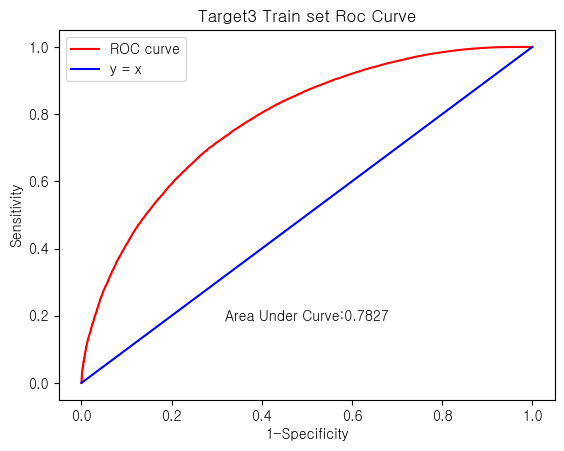

In [62]:
tr_pred2_target3 = model2_target3.predict(train_2)
tr_pred2_target3

train_2['tr_pred2_target3'] = tr_pred2_target3

cal2_target3 = train_2.copy()

cal2_target3.dropna(subset=['tr_pred2_target3'], inplace=True)

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(cal2_target3['target3'], cal2_target3['tr_pred2_target3'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(cal2_target3['target3'], cal2_target3['tr_pred2_target3'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target3 Train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [63]:
cal2_target3['prob_5'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
cal2_target3['prob_6'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
cal2_target3['prob_7'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
cal2_target3['prob_8'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
cal2_target3['prob_9'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

cal2_target3['prob_85'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(cal2_target3[cal2_target3['근내환산점수']>=3])}")
print(f"TARGET1개수:{len(cal2_target3[cal2_target3['target3']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.5])}")
print(f"prob_5개수:{len(cal2_target3[cal2_target3['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.6])}")
print(f"prob_6개수:{len(cal2_target3[cal2_target3['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.7])}")
print(f"prob_7개수:{len(cal2_target3[cal2_target3['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.8])}")
print(f"prob_8개수:{len(cal2_target3[cal2_target3['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.9])}")
print(f"prob_9개수:{len(cal2_target3[cal2_target3['prob_9']==1])}")

5이상개수:250177
TARGET1개수:250177
0.5이상개수:272436
prob_5개수:272436
0.6이상개수:269694
prob_6개수:269694
0.7이상개수:263565
prob_7개수:263565
0.8이상개수:246786
prob_8개수:246786
0.9이상개수:192638
prob_9개수:192638


#### confusion matirx, train_2

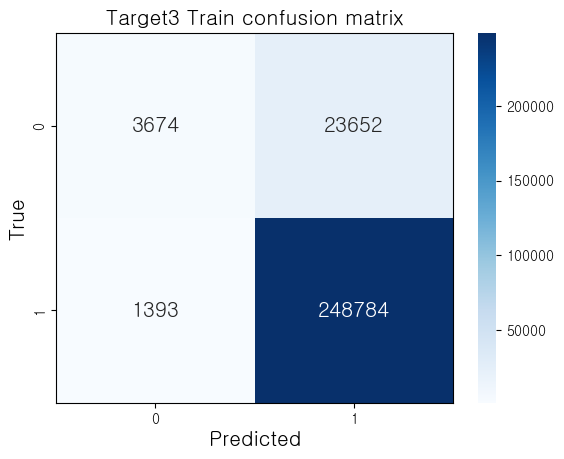

In [64]:
# cut-off 0.5
cm = confusion_matrix(cal2_target3['target3'], cal2_target3['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target3 Train confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [65]:
perfo(cal2_target3['target3'], cal2_target3['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.994431942184933,
 'Specificity': 0.13445070628705263,
 'Precision': 0.9131832797427653,
 'Accuracy': 0.9097487234372241,
 'F-beta Score': 0.9520773497788995}

#### train_2, test 성능 보기

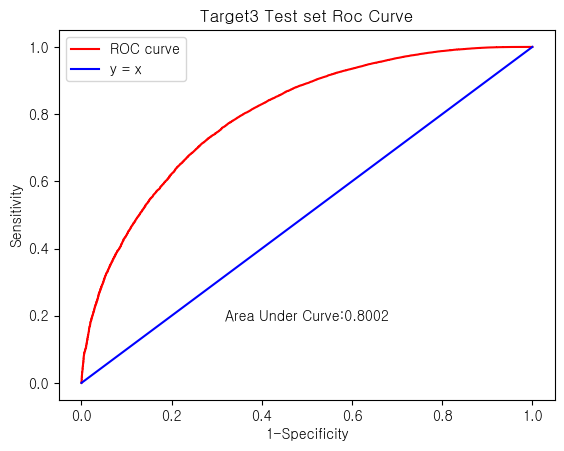

In [66]:
val_pred2_target3 = model2_target3.predict(val)
val_copy2_target3 = val.copy()
val_copy2_target3['val_pred2_target3'] = val_pred2_target3

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(val_copy2_target3['target3'], val_copy2_target3['val_pred2_target3'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(val_copy2_target3['target3'], val_copy2_target3['val_pred2_target3'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target3 Test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [67]:
val_copy2_target3['prob_5'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
val_copy2_target3['prob_6'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
val_copy2_target3['prob_7'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
val_copy2_target3['prob_8'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
val_copy2_target3['prob_9'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

val_copy2_target3['prob_85'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(val_copy2_target3[val_copy2_target3['근내환산점수']>=3])}")
print(f"TARGET1개수:{len(val_copy2_target3[val_copy2_target3['target3']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.5])}")
print(f"prob_5개수:{len(val_copy2_target3[val_copy2_target3['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.6])}")
print(f"prob_6개수:{len(val_copy2_target3[val_copy2_target3['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.7])}")
print(f"prob_7개수:{len(val_copy2_target3[val_copy2_target3['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.8])}")
print(f"prob_8개수:{len(val_copy2_target3[val_copy2_target3['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.9])}")
print(f"prob_9개수:{len(val_copy2_target3[val_copy2_target3['prob_9']==1])}")

5이상개수:118300
TARGET1개수:118300
0.5이상개수:126752
prob_5개수:126752
0.6이상개수:125586
prob_6개수:125586
0.7이상개수:123214
prob_7개수:123214
0.8이상개수:117479
prob_8개수:117479
0.9이상개수:97147
prob_9개수:97147


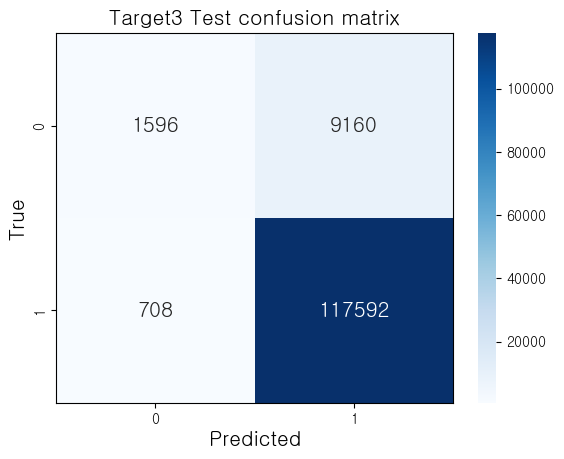

In [68]:
# cut-off 0.5
cm = confusion_matrix(val_copy2_target3['target3'], val_copy2_target3['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target3 Test confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [69]:
perfo(val_copy2_target3['target3'], val_copy2_target3['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.9940152155536771,
 'Specificity': 0.14838229825213833,
 'Precision': 0.9277328957334007,
 'Accuracy': 0.923537069179271,
 'F-beta Score': 0.9597309958702643}

In [1]:
from scipy.stats import poisson

# 포아송 분포 파라미터
mu = 4.6

# 사망자 수별 확률 계산
probabilities = [poisson.pmf(k, mu) for k in range(9)]
cumulative_prob = poisson.cdf(8, mu)
prob_9_or_more = 1 - cumulative_prob

# 결과 출력
print([round(prob, 3) for prob in probabilities])
print("확률(9명 이상):", round(prob_9_or_more,3))


[0.01, 0.046, 0.106, 0.163, 0.188, 0.173, 0.132, 0.087, 0.05]
확률(9명 이상): 0.045


In [4]:
2000*30 + 15000*30 +15000*5

585000